In [25]:
# clustering with K-means on iris flowers
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [26]:
# view the dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [27]:
# display the names of the attributes
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [28]:
# dísplay column names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
# create dataframe with all columns
df=pd.DataFrame(iris.data, columns=iris.feature_names)

In [30]:
# scaling for petal length and width cols using MinMaxscaler
scaler=MinMaxScaler()
# fit the scale to petal length
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']= scaler.transform(df[['petal length (cm)']])
# fit the scale to petal width
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

In [31]:
# display the data frame after scaling of data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,0.067797,0.041667
1,4.9,3.0,0.067797,0.041667
2,4.7,3.2,0.050847,0.041667
3,4.6,3.1,0.084746,0.041667
4,5.0,3.6,0.067797,0.041667


In [32]:
missing_values = df.isnull().sum()  
missing_values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [33]:
# elbow plot to confirm the K value
sse=[]
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']] )
    sse.append (km.inertia_)

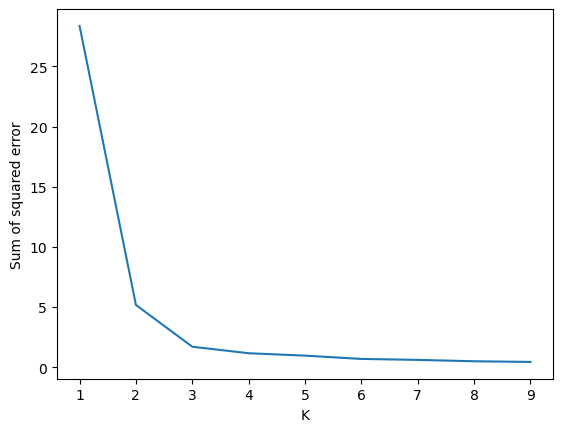

In [34]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [35]:
# the above plot suggests k value is 3

In [36]:
# now fit the K-Means clustering to petal length and width cols
# take the k value as 3 as suggested
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
# storing the y_predicted values into cluster column in data frame
df['cluster']=y_predicted
df.head ()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,0.067797,0.041667,1
1,4.9,3.0,0.067797,0.041667,1
2,4.7,3.2,0.050847,0.041667,1
3,4.6,3.1,0.084746,0.041667,1
4,5.0,3.6,0.067797,0.041667,1


In [38]:
# find cluster centers
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

In [39]:
# divide into data frames depending on cluster numbers
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

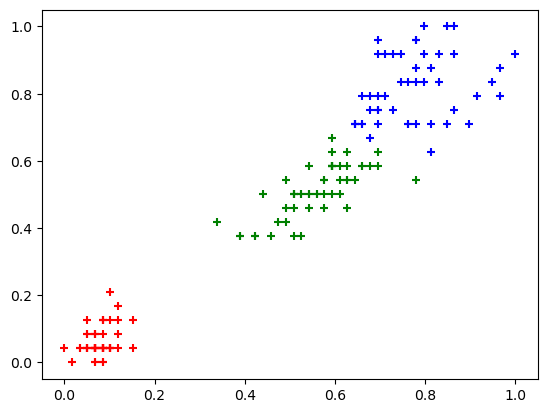

In [40]:
# visualize the 3 groups. draw the scatter plots of each cluster wi th their centers
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green', marker='+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red', marker='+')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue',marker='+')

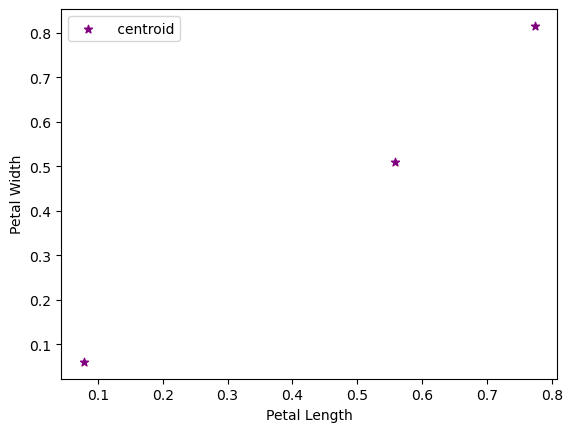

In [41]:
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='purple', marker='*',label=' centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()